In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.optimize import curve_fit

In [15]:
path="/work/cms16/sb95/Finzi_collab_bad_solvent_different_temp/"
Rg={}
for val1 in os.listdir(path):
    if 'N_' in val1:
        N = int(val1.split("N_")[-1])
        for val2 in os.listdir(os.path.join(path, val1)):
            chi = float(val2.split('chi_')[-1])
            if chi not in list(Rg.keys()):
                Rg[chi] = {}
            for val3 in sorted(os.listdir(os.path.join(path, val1, val2)), key=lambda x: float(x.split('temp_')[-1])):
                temp = float(val3.split('temp_')[-1])
                if temp not in list(Rg[chi].keys()):
                    Rg[chi][temp] = []
                rgval=[]
                for val4 in os.listdir(os.path.join(path, val1, val2, val3)):
                    if 'energy_report' in val4:
                        # print(val4)
                        try:
                            rg=np.loadtxt(os.path.join(path,val1, val2, val3, val4), skiprows=1)[:,2].mean()
                            rgval.append(rg)
                        except(IndexError): pass
                Rg[chi][temp].append([N,np.mean(rgval)])
                # print(chi, temp, N, np.mean(rgval))
                
                
Rg            

/tmp/ipykernel_25336/3962205350.py:19: UserWarning: loadtxt: input contained no data: "/work/cms16/sb95/Finzi_collab_bad_solvent_different_temp/N_500/chi_-0.6/temp_90.0/polymer_9_energy_report.txt"
  rg=np.loadtxt(os.path.join(path,val1, val2, val3, val4), skiprows=1)[:,2].mean()
/tmp/ipykernel_25336/3962205350.py:19: UserWarning: loadtxt: input contained no data: "/work/cms16/sb95/Finzi_collab_bad_solvent_different_temp/N_1000/chi_-0.6/temp_230.0/polymer_0_energy_report.txt"
  rg=np.loadtxt(os.path.join(path,val1, val2, val3, val4), skiprows=1)[:,2].mean()


{-1.0: {90.0: [[500, 2.838314882745826],
   [1000, 3.703853137373737],
   [5000, 9.124252381818183],
   [2000, 4.647883827272727]],
  120.0: [[500, 2.660935254328091],
   [1000, 3.396647727133934],
   [5000, 7.407933190909091],
   [2000, 4.602414945454545]],
  150.0: [[500, 2.5521413847025496],
   [1000, 3.2049240951579856],
   [5000, 7.688779463636363],
   [2000, 4.255545281818183]],
  180.0: [[500, 2.4643364937500003],
   [1000, 3.052841054359926],
   [5000, 7.66690870909091],
   [2000, 3.9526108090909085]],
  200.0: [[500, 2.413610199576869],
   [1000, 2.9361488286295794],
   [5000, 6.806580599999999],
   [2000, 3.7940107545454547]],
  230.0: [[500, 2.3407422293970637],
   [1000, 2.8647081954545457],
   [5000, 6.2915026727272725],
   [2000, 3.5838438363636365]],
  260.0: [[500, 2.3120392299438457],
   [1000, 2.7657130562926566],
   [5000, 5.916021890909091],
   [2000, 3.5346098363636367]],
  290.0: [[500, 4.038166784435982],
   [1000, 2.7970772684080623],
   [5000, 5.605167009090909

In [27]:
def fit_fn(x,a,b):
    return a*x**b

[0.07067442 0.56787573]
[0.7505698 0.2250376]


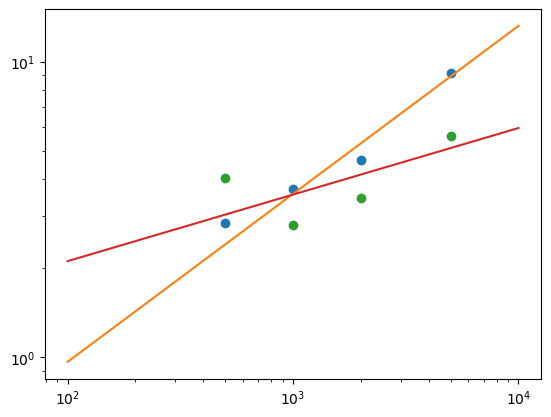

In [43]:
chi=-1.0
Nvals = np.logspace(2,4,10)
plt.loglog(np.array(Rg[chi][90.0])[:,0],np.array(Rg[chi][90.0])[:,1],'o')
popt,pcov = curve_fit(fit_fn,np.array(Rg[chi][90.0])[:,0],np.array(Rg[chi][90.0])[:,1])
print(popt)
plt.loglog(Nvals, fit_fn(Nvals, *popt))
plt.loglog(np.array(Rg[chi][290.0])[:,0],np.array(Rg[chi][290.0])[:,1],'o')
popt,pcov = curve_fit(fit_fn,np.array(Rg[chi][290.0])[:,0],np.array(Rg[chi][290.0])[:,1])
print(popt)
plt.loglog(Nvals, fit_fn(Nvals, *popt))


In [42]:
%%bash
for val in {60..300..30}; do 
echo $val 
done

60
90
120
150
180
210
240
270
300
